# Airbnb Price Prediction

In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.core.display import display, HTML
from IPython.display import Javascript, display
from ipywidgets import interact, interactive, fixed, interact_manual

from datetime import date, datetime,timedelta
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

from pre_process import dollar_to_number, filter_room_details, filter_timespan, create_timeseries

In [2]:
listings = pd.read_csv("data/listings.csv")
calendar = pd.read_csv("data/calendar.csv")
zipcodes = listings["zipcode"].astype(str).str.split("-").str[0].unique().astype(np.float64)
zipcodes = zipcodes[~np.isnan(zipcodes)].astype(np.int64)

C:\Users\rpkan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listings = listings[['id','accommodates','bedrooms','beds', 'zipcode', 'review_scores_rating']]
calendar = calendar[['listing_id','date','price']]
calendar.dropna()

,listing_id,date,price
0,5570,2019-11-21,"$2,050.00"
1,5570,2019-11-22,"$2,050.00"
2,5570,2019-11-23,"$2,050.00"
3,5570,2019-11-24,"$2,050.00"
4,5570,2019-11-25,"$2,050.00"
...,...,...,...
4954505,39435249,2020-11-15,$135.00
4954506,39435249,2020-11-16,$135.00
4954507,39435249,2020-11-17,$135.00
4954508,39435249,2020-11-18,$135.00


In [4]:
output_bedrooms_slider = widgets.Text()
output_guest_slider = widgets.Text()
output_bed_slider = widgets.Text()
output_ratings_slider = widgets.Text()

print ('Mandatory Fields')
start_date_widget = widgets.DatePicker(description='Start Date')
end_date_widget = widgets.DatePicker(description='End Date')
display(start_date_widget, end_date_widget)


def g(Guests):
    output_guest_slider.value = str(Guests)

interact(g, Guests=widgets.IntSlider(min=0, max=10, step=1));

print('\n')
print('Optional Fields')

def f(Bedrooms):
    output_bedrooms_slider.value = str(Bedrooms)

interact(f, Bedrooms =widgets.IntSlider(min=0, max=10, step=1));

def b(Beds):
    output_bed_slider.value = str(Beds)

interact(b, Beds=widgets.IntSlider(min=0, max=10, step=1));


zip_code_widget = widgets.Dropdown(options=[("All", 0)] + [(z, z) for z in zipcodes], value=0, description='Zip Code:')

display(zip_code_widget)

def r(Ratings):
    output_ratings_slider.value = str(Ratings)
interact(r, Ratings=widgets.IntSlider(min=0, max=100, step=5));

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

button = widgets.Button(description="Confirm Submission")
button.on_click(run_all)
display(button)

Mandatory Fields


DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

interactive(children=(IntSlider(value=0, description='Guests', max=10), Output()), _dom_classes=('widget-inter…



Optional Fields


interactive(children=(IntSlider(value=0, description='Bedrooms', max=10), Output()), _dom_classes=('widget-int…

interactive(children=(IntSlider(value=0, description='Beds', max=10), Output()), _dom_classes=('widget-interac…

Dropdown(description='Zip Code:', options=(('All', 0), (92109, 92109), (92104, 92104), (92106, 92106), (92037,…

interactive(children=(IntSlider(value=0, description='Ratings', step=5), Output()), _dom_classes=('widget-inte…

Button(description='Confirm Submission', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
min_num_bedrooms = int(output_bedrooms_slider.value)
num_guests = int(output_guest_slider.value)
min_num_beds = int(output_bed_slider.value)
minimum_review = int(output_ratings_slider.value)
start_date = start_date_widget.value
end_date = end_date_widget.value
zipcode = zip_code_widget.value

In [10]:
assert start_date < end_date
assert start_date > datetime.now().date()
assert 0 <= min_num_bedrooms <= 10
assert 0 <= min_num_beds <= 10
assert 1 <= num_guests <= 10
assert 0 <= minimum_review <= 100
assert zipcode in zipcodes or zip_code == 0

# Check cell to check the user input values

In [12]:
print(' Bedrooms =', min_num_bedrooms, '\n', 'Guests =  ', num_guests, '\n', 'Beds =    ', min_num_beds, '\n', 'Minimum Rating = ', minimum_review)

 Bedrooms = 0 
 Guests =   5 
 Beds =     0 
 Minimum Rating =  0


In [18]:
df_filter_room_details_test = filter_room_details(listings, num_guests, 0, 0, zipcode, minimum_review)
#df_filter_room_details_test

In [14]:
calendar['price'] = calendar['price'].apply(dollar_to_number)
calendar['date'] = pd.to_datetime(calendar['date'])

In [15]:
df_timeseries_test = filter_timespan(df_filter_room_details_test, calendar, start_date, end_date)


In [16]:
test_timeseries = create_timeseries(listings, calendar, num_guests, start_date, end_date, min_num_bedrooms, min_num_beds, zipcode, minimum_review)

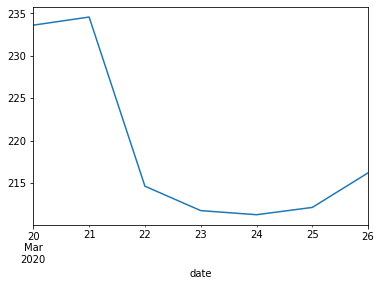

In [17]:
lines = test_timeseries.plot.line()
lines